# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [21]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

In [22]:
# your code(s)
data=pd.read_csv("/home/sreevishak/Desktop/DUK/predictive/assignment/Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


<function matplotlib.pyplot.show(close=None, block=None)>

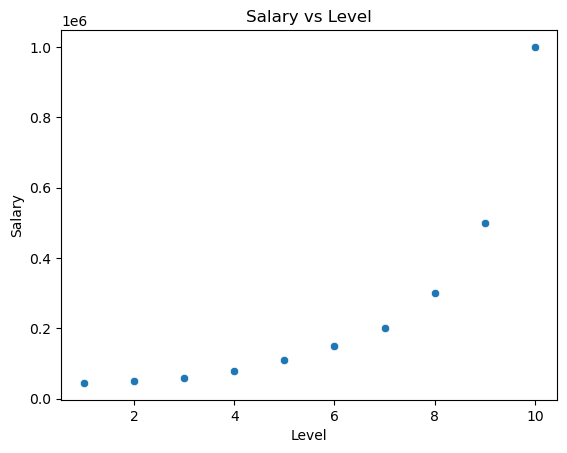

In [34]:
print(data.describe())
#plt.figure(figsize=(10, 6))
sns.scatterplot(x='Level', y='Salary', data=data)
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show

### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> NO
* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> NO
* Explain why you said yes or no to the above questions.
> It does'nt show a linear relashionship so fitting a linear model will not yield needed result result



## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b)= your\;answer$$

Predicted Salary for level 7.5: $328672.35


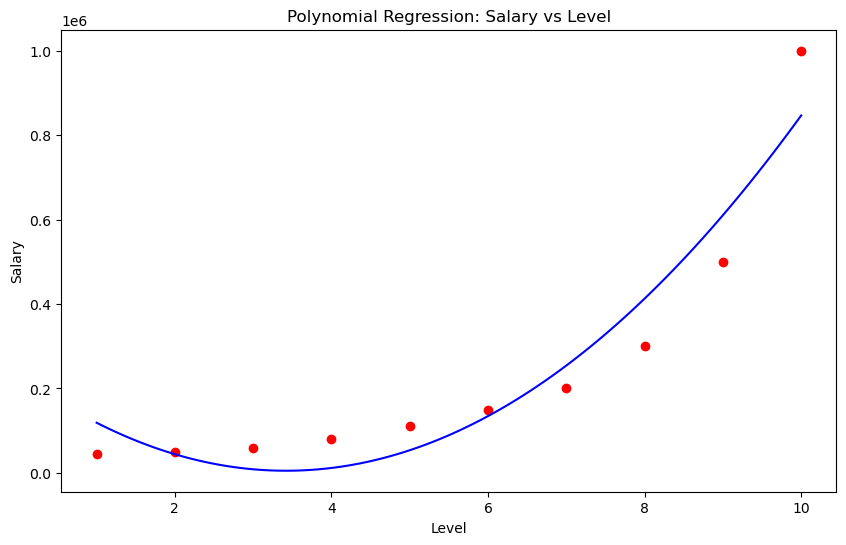

In [35]:
X = data['Level'].values.reshape(-1, 1)
y = data['Salary'].values
X_poly = np.hstack((X, X**2))
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
coefficients = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

def poly_model(x):
    return coefficients[0] + coefficients[1] * x + coefficients[2] * x**2

level_new = 7.5
predicted_salary = poly_model(level_new)
print(f"Predicted Salary for level {level_new}: ${predicted_salary:.2f}")

# Plotting the polynomial curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red')
plt.plot(np.linspace(min(X), max(X), 100), poly_model(np.linspace(min(X), max(X), 100)), color='blue')
plt.title('Polynomial Regression: Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()


### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
>yes
* Explain why you said yes or no to the above questions.
> The Mean Squared Error (MSE) quantifies the average squared difference between the predicted values and the actual values in the training dataset. By minimizing the MSE, the polynomial regression model seeks to accurately fit the training data while preventing overfitting.


**Derivatives of cost function:**
$$\frac{\partial MSE}{\partial w_1}  = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (w_1x^2_i + w_2x_i + b))x^2_i$$

$$\frac{\partial MSE}{\partial w_2}  = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (w_1x^2_i + w_2x_i + b))x_i$$

$$\frac{\partial MSE}{\partial b}  = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (w_1x^2_i + w_2x_i + b))$$

**Gradient Descent Algorithm:**
```
Repeat until converges:
```
$$w_1 = w_1 - \alpha \frac{\partial MSE}{\partial w_1}$$

$$w_2 = w_2 - \alpha \frac{\partial MSE}{\partial w_2}$$

$$b = b - \alpha \frac{\partial MSE}{\partial b}$$

## Implementation of the model

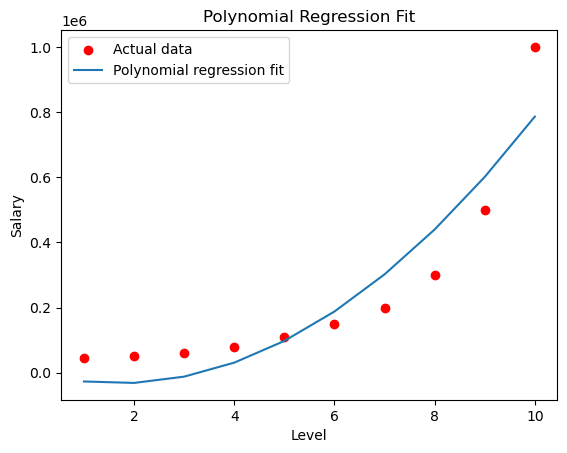

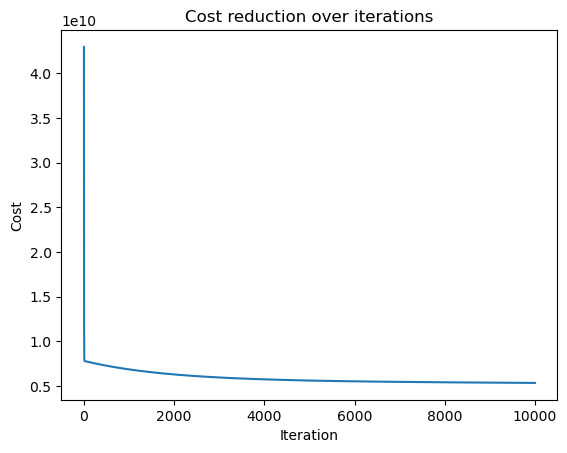

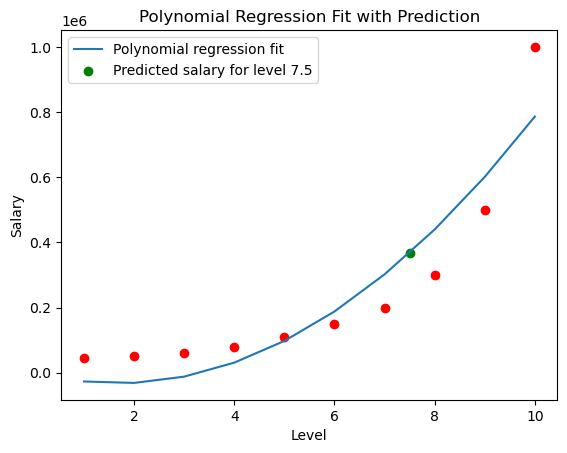

Predicted Salary for level 7.5: $367,915.23


In [36]:
# Polynomial Regression Model Function
def polynomial_regression(x, coefficients):
    """ Calculates y_pred = b + w1*x + w2*x^2 """
    y_pred = np.dot(x, coefficients)
    return y_pred

# Cost Function - Mean Squared Error
def compute_cost(X, y, coefficients):
    """ Computes the mean squared error cost """
    n = len(y)
    y_pred = polynomial_regression(X, coefficients)
    cost = (1/(2*n)) * np.sum((y_pred - y) ** 2)
    return cost

# Derivative of Cost Function
def derivatives(X, y, coefficients):
    """ Computes the derivatives of the MSE cost function """
    n = len(y)
    y_pred = polynomial_regression(X, coefficients)
    d_coefficients = (1/n) * np.dot(X.T, (y_pred - y))
    return d_coefficients

# Gradient Descent Function to Minimize the Cost Function
def gradient_descent(X, y, coefficients, learning_rate, iterations):
    """ Performs gradient descent to learn coefficients """
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        coefficients -= learning_rate * derivatives(X, y, coefficients)
        cost_history[i] = compute_cost(X, y, coefficients)
    return coefficients, cost_history

# Load the dataset
data=pd.read_csv(r"/home/sreevishak/Desktop/DUK/predictive/assignment/Position_Salaries.csv")
X = data['Level'].values.reshape(-1, 1)
y = data['Salary'].values

# Prepare polynomial features: x, x^2
X_poly = np.hstack((np.ones((X.shape[0], 1)), X, X**2))
# Initial coefficients (b, w1, w2)
coefficients = np.zeros(3)
learning_rate = 0.0001
iterations = 10000

# Run gradient descent
coefficients, cost_history = gradient_descent(X_poly, y, coefficients, learning_rate, iterations)

# Predicting using optimized coefficients
y_pred = polynomial_regression(X_poly, coefficients)
# Plot polynomial model
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, y_pred, label='Polynomial regression fit')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# Plot iteration vs cost
plt.plot(range(iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost reduction over iterations')
plt.show()
# New level prediction
level_new = 7.5
new_X = np.array([1, level_new, level_new**2]).reshape(1, -1)
predicted_salary = polynomial_regression(new_X, coefficients)

# Plot with the new prediction
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, label='Polynomial regression fit')
plt.scatter([level_new], [predicted_salary], color='green', label=f'Predicted salary for level {level_new}')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit with Prediction')
plt.legend()
plt.show()

print(f"Predicted Salary for level {level_new}: ${predicted_salary[0]:,.2f}")



### Answer the following

* What is learning rate?
> it will converge but the traning time will be too long(slow traning time)
* What will happen if the learning rate is too large?
> if it is too large the the step size will be large and it may not converge to minima.it will overshoot the minimum, leading to divergence or oscillations around the optimal values
* What will happen if the learning rate is too small?
> it is the parameter that controls the size of the steps taken during the optimization process in gradient descent
* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
Change the second-order model expression from:
$$\hat{y} = w_1 x^2 + w_2 x + b$$
to the third-order model expression:
$$\hat{y} = w_1 x^3 + w_2 x^2 + w_3 x + b$$
The cost function will be modified into:
$$MSE(w_1, w_2, w_3, b) = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \left( w_1 x^3_i + w_2 x^2_i + w_3 x_i + b \right) \right)^2$$

Calculate derivative of MSE with respect to w_3:
$$\frac{\partial MSE}{\partial w_3}  = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (w_1x^3_i + w_1x^2_i + w_2x_i + b))x^3_i$$

Update the value of w_3 util it converges:

$$w_3 = w_3 - \alpha \frac{\partial MSE}{\partial w_3}$$